In [9]:
from qutip import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [10]:
# Given a rabi value, and a set detuning value, this function calculates the inverse probability of a
# Rydberg blockade as a function of distance between 2 atoms

def rydberg(rabi):
    dlist = np.linspace(4, 16, 30) # Distance between 4 and 16 um.
    states = []
    p = []
    for d in dlist:
        tlist = np.linspace(0, 4e-6, 100) # Timescales of 4 us (Max on the machine)
        pi = np.pi
        um = 1e-6
        MHZ = 1e6
        rabi = rabi
        C = 2*pi*862690*MHZ # Constant C6 provided by QuEra
        delta = C/(((3*np.sqrt(10))**(1/2) * 4)**6) # Calculating delta from the Rydberg constant radius, rabi = 0
        R = d

        #Declare states
        rr = tensor(ket2dm(basis(2, 0)), ket2dm(basis(2, 0)))
        gg = tensor(ket2dm(basis(2, 1)), ket2dm(basis(2, 1)))
        rg = tensor(ket2dm(basis(2, 0)), ket2dm(basis(2, 1)))
        r = basis(2, 0)
        
        g = basis(2, 1)

        #Declare Hamiltonian
        H_int = C/(R**6)*rr*rr.dag()
        H1 = rabi * tensor((r * g.dag() + g * r.dag()), qeye(2)) - delta * tensor(ket2dm(r), qeye(2))
        H2 = rabi * tensor(qeye(2), (r * g.dag() + g * r.dag())) - delta * tensor(qeye(2), ket2dm(r))
        
        H = H_int + H1 + H2

        # Mesolve
        options = Options(nsteps=100000000)

        output = mesolve(H, gg, tlist, [], [], options=options)
        states = output.states

        p.append(max(expect(rr* rr.dag(), states))) # Extracting projection of both atoms in a rydberg state 
    return p, states

    

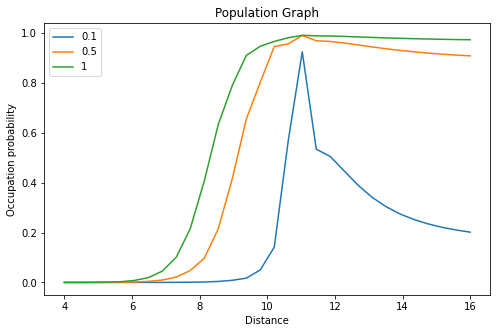

In [18]:
# Testing various rabi frequencies to observe their effects

MHZ = 1e6

rabi1 = 2*pi*0.1 * MHZ
rabi2 = 2*pi*0.5*MHZ
rabi3 = 2*pi*MHZ
p1, states1 = rydberg(rabi1)
p2, states2 = rydberg(rabi2)
p3, states3 = rydberg(rabi3)

dlist = np.linspace(4, 16, 30)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(dlist, p1, label="0.1")
ax.plot(dlist, p2, label="0.5")
ax.plot(dlist, p3, label="1")
# ax.plot([12.3,12.3], [0,1])
ax.legend()
ax.set_xlabel('Distance')
ax.set_ylabel('Occupation probability')
ax.set_title('Population Graph');

''' 
We see our graph, which has surpressed possibility of both atoms being in the rydberg states at shorter radiuses,
but this blows up later as they are no longer in a rydberg blockade.

'''